In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib Inline

In [2]:
# Reading the data
df_data = pd.read_excel("E:\SIMPLILEARN\KAGGLE\DataSet\DS - Assignment Part 1 data set.xlsx")

In [3]:
# Explore the data
df_data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
# Describing the data to get statistical info
df_data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [6]:
# Changing Data Types of timestamp date into Datetime
df_data['Transaction date'] = pd.to_datetime(df_data['Transaction date'], format="%y%m%d")
print(df_data['Transaction date'].dtypes)

datetime64[ns]


In [7]:
df_data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [8]:
# There is  no null values in the data
df_data.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

# EDA

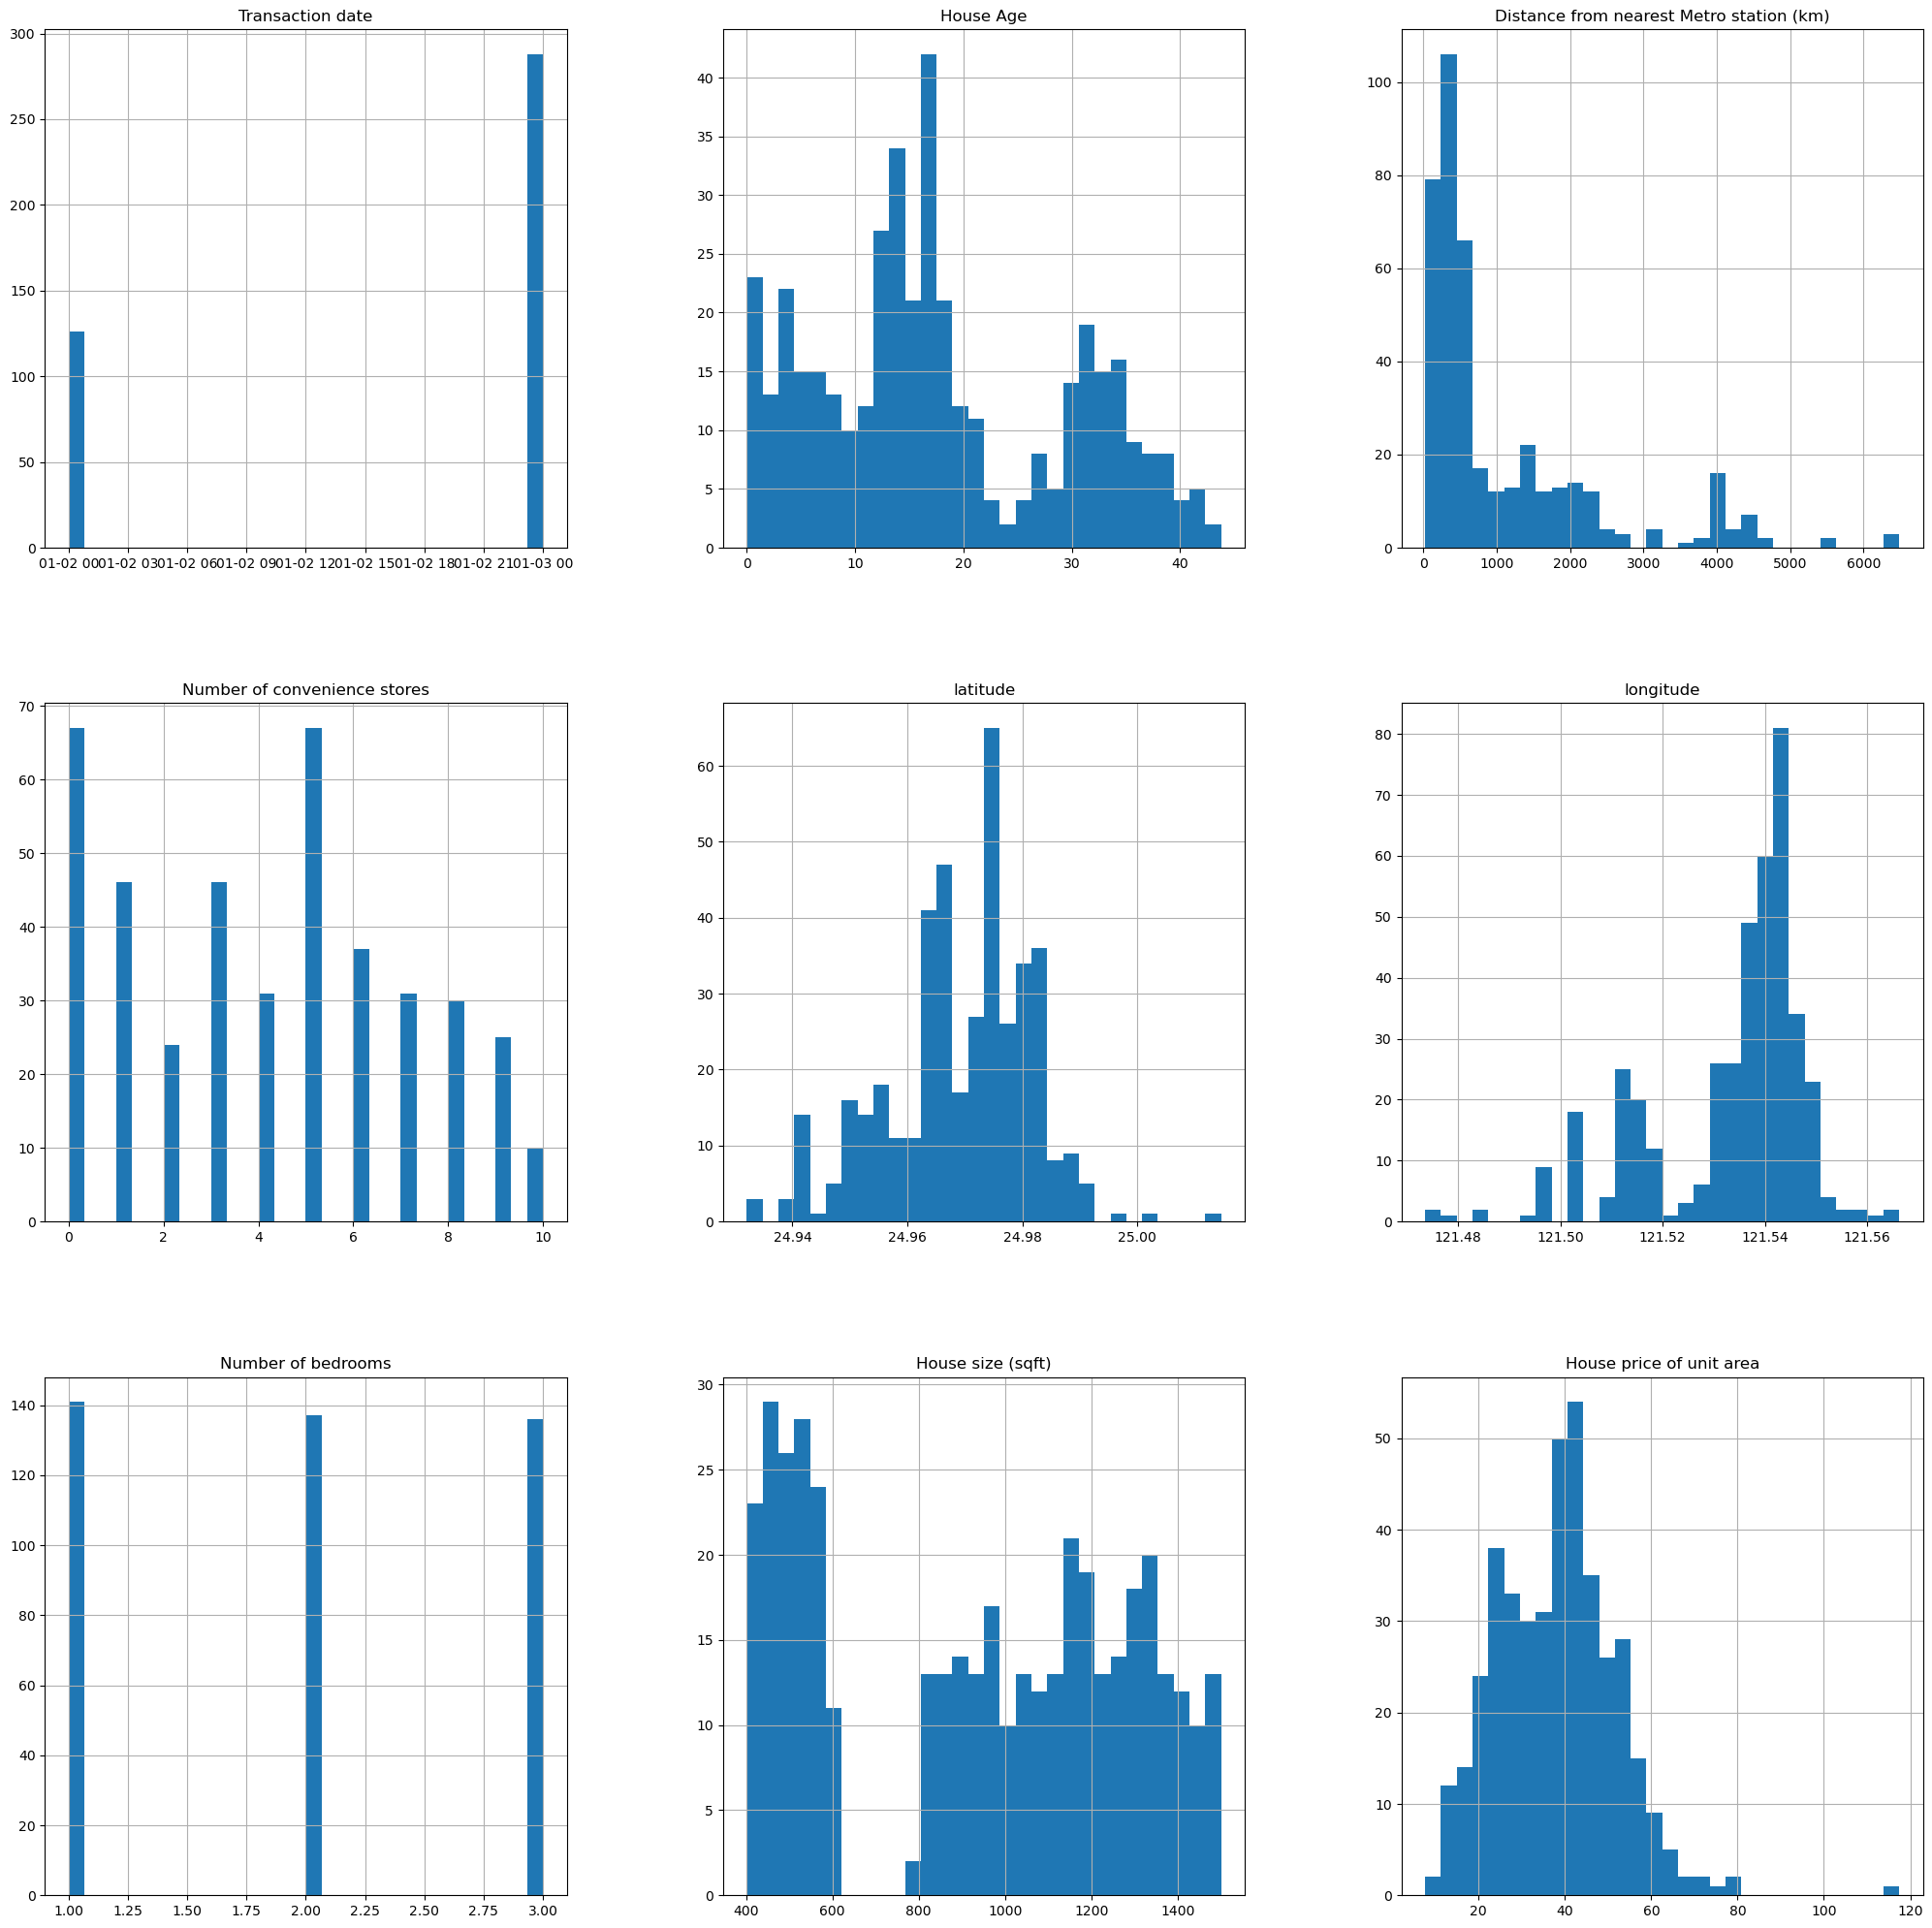

In [9]:
# Histogranm for the data
df_data.hist(figsize=(25,25),bins=30);

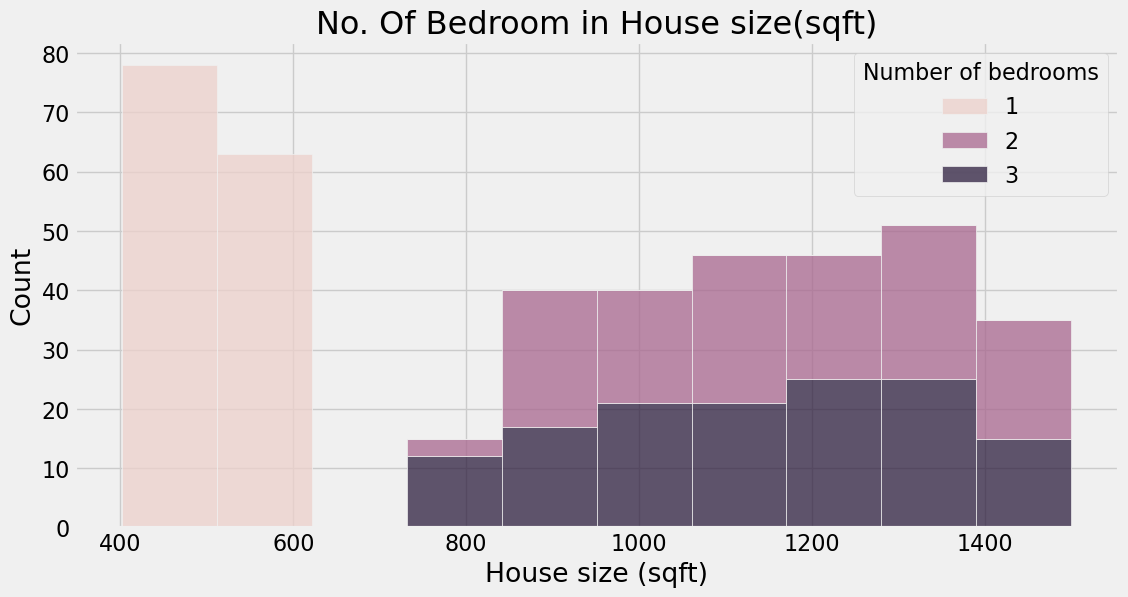

In [255]:
# No.of bedrooms are their in House Size. Depending on plot area  
plt.figure(figsize=(12,6))
sns.histplot(data=df_data, x="House size (sqft)", hue='Number of bedrooms', multiple="stack")
plt.title("No. Of Bedroom in House size(sqft)")
plt.show()

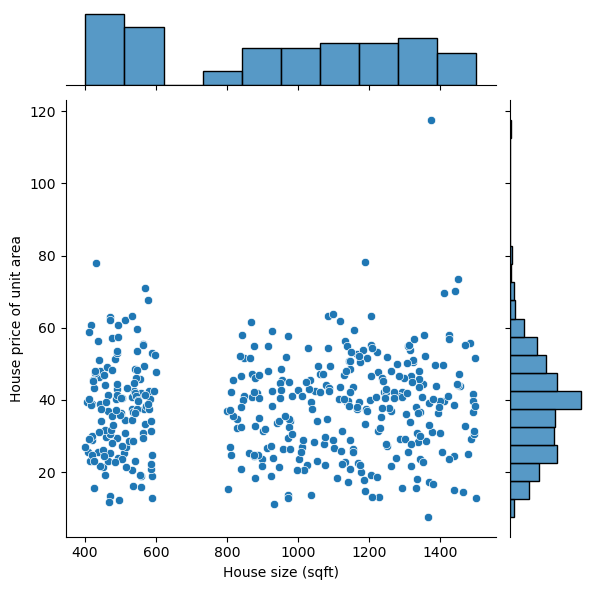

In [11]:
# Price of house according to House Size
sns.jointplot(df_data['House size (sqft)'], df_data['House price of unit area'])

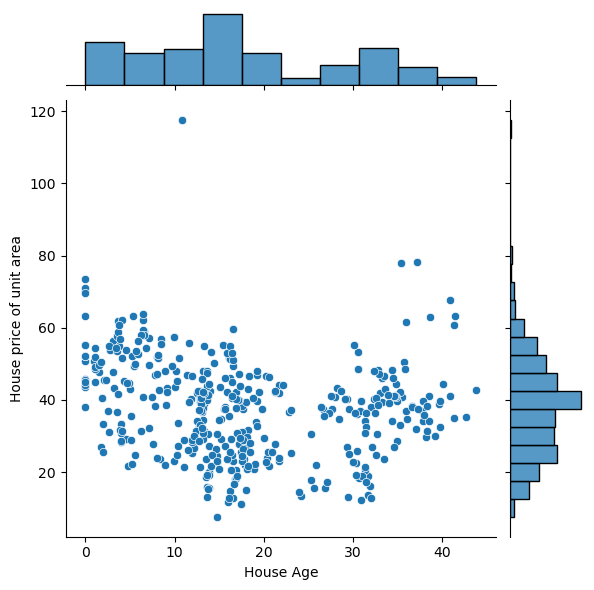

In [12]:
# Price of house according to age of the house
sns.jointplot(df_data['House Age'], df_data['House price of unit area'])

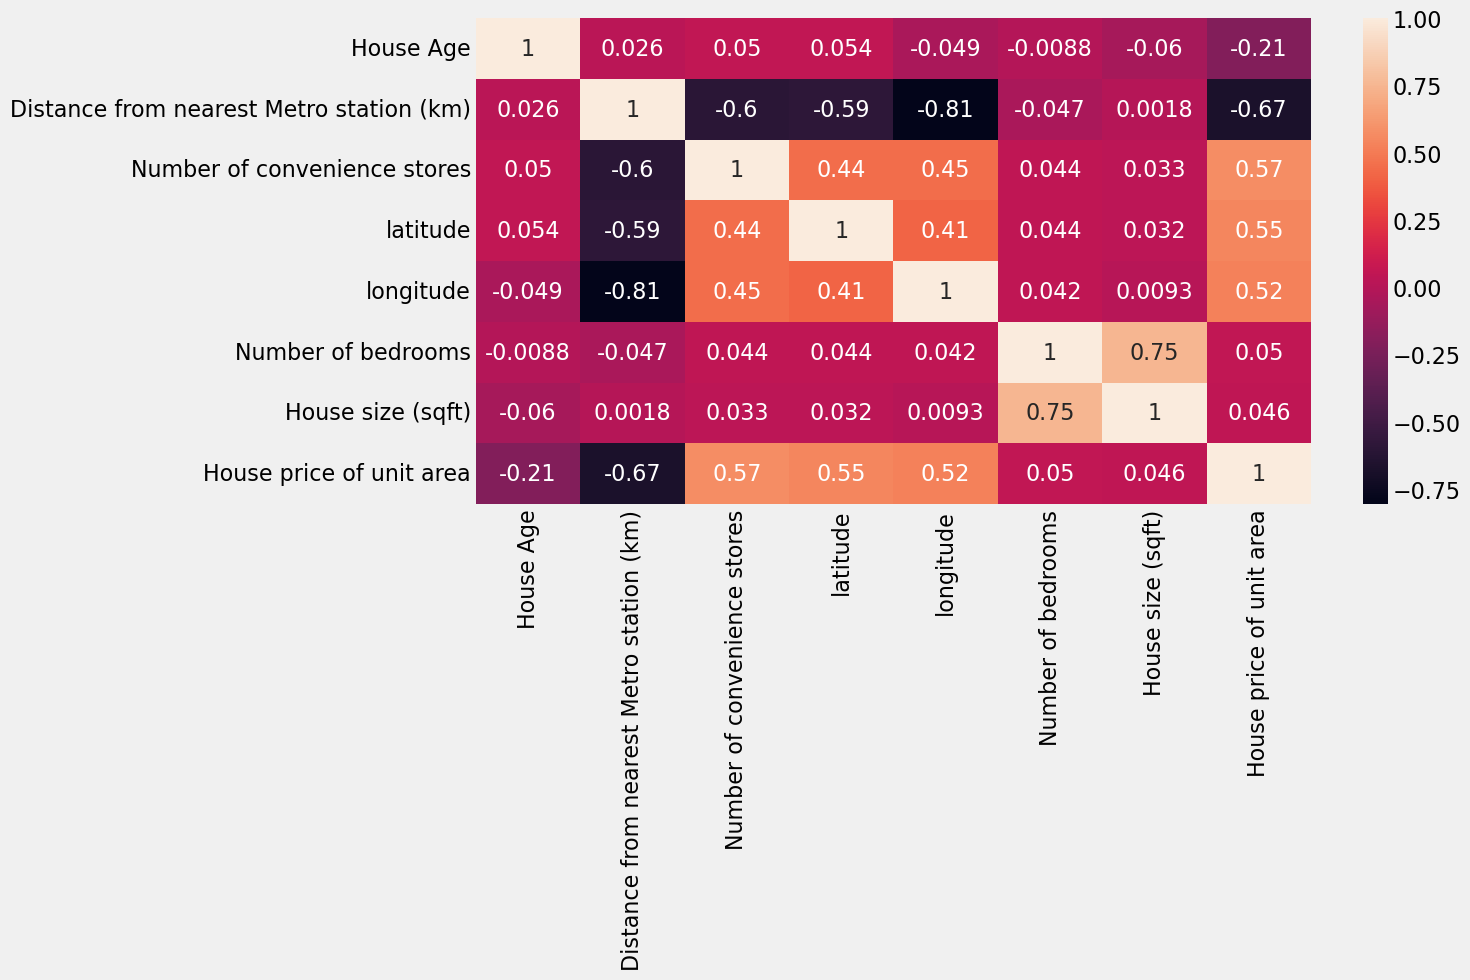

In [254]:
# Heat map to see correlation with eatures
fig, axe = plt.subplots(figsize=(12,6))
sns.heatmap(data = df_data.corr(), annot=True)
plt.show()

* From above heat map we can see that columns like House_Size(sqft), House_Price_per_unit_area,
  Number of bedrooms, Number of convenience stores is Highly correlated.
* Whereas features like Distance from nearest Metro station (km) & House price of unit area is Negatively correlated.
* House price of unit area & Number of convenience stores have a strong relation.

Text(0.5, 1.0, 'Price vs location of Area')

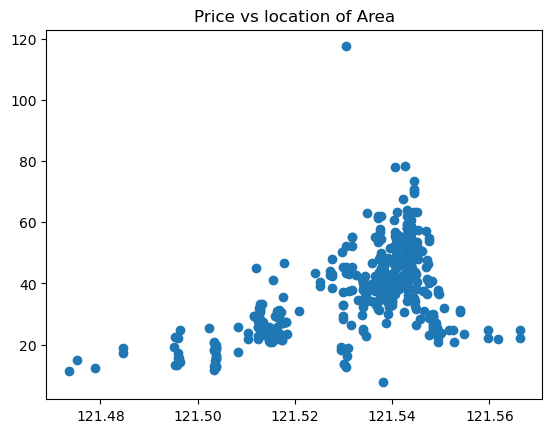

In [14]:
# house pricing location wise
plt.scatter(df_data['longitude'], df_data['House price of unit area'])
plt.title('Price vs location of Area')

Text(0.5, 1.0, 'Price vs location of Area')

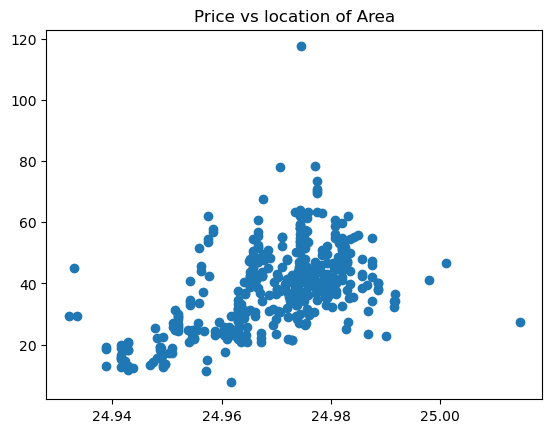

In [15]:
# house pricing location wise
plt.scatter(df_data['latitude'], df_data['House price of unit area'])
plt.title('Price vs location of Area')

Text(0.5, 1.0, 'Price vs No.Of bedrooms')

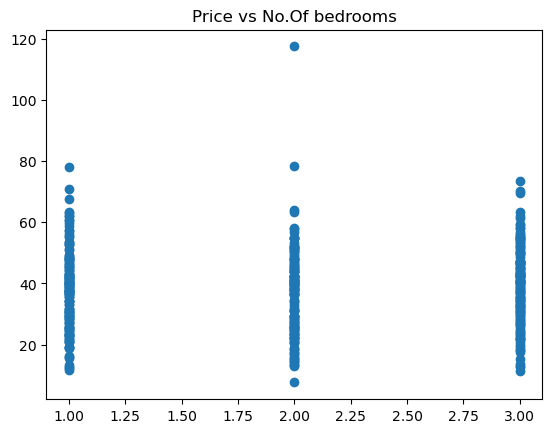

In [16]:
# Scatter plot for no. of bedrooms vs Price of House
plt.scatter(df_data['Number of bedrooms'], df_data['House price of unit area'])
plt.title('Price vs No.Of bedrooms')

In [17]:
df_data.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [173]:
# Assigning data to new variable
final_data = df_data

# Training The Model

In [174]:
# Extracting features and target variables from data
y = final_data['House price of unit area']
X = final_data.drop(columns=['House price of unit area', 'Transaction date'])

print(y.shape)
print(X.shape)

(414,)
(414, 7)


In [175]:
X.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,32.0,84.87882,10,24.98298,121.54024,1,575
1,19.5,306.59470,9,24.98034,121.53951,2,1240
2,13.3,561.98450,5,24.98746,121.54391,3,1060
3,13.3,561.98450,5,24.98746,121.54391,2,875
4,5.0,390.56840,5,24.97937,121.54245,1,491


* Splitting the dataset

In [176]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

**Standardizing the dataset**

In [177]:
from sklearn.preprocessing import StandardScaler
stand_scaler = StandardScaler()
X_train = stand_scaler.fit_transform(X_train)
x_test = stand_scaler.transform(x_test)

## Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, Y_train)

LinearRegression()

In [179]:
# Makiung prediction on testing data
y_pred1 = model1.predict(x_test)

In [180]:
# Checking The Mean absolute error represents the average of the absolute difference between the actual and 
# predicted values in the dataset
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error
print("MAE:",mean_absolute_error(y_test, y_pred1))
print("MSE:",mean_squared_error(y_test, y_pred1))

MAE: 5.4210650091267025
MSE: 49.16815408793026


In [181]:
# RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE: ",np.sqrt(mean_squared_error(y_test, model1.predict(x_test))))
print("RMSE- train: ",np.sqrt(mean_squared_error(Y_train, model1.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model1.score(x_test, y_test)))

RMSE:  7.012000719333267
RMSE- train:  9.316339040212315
R2 Value/Coefficient of Determination: 0.6706304461258126


In [182]:
# Accuracy score
print(model1.score(x_test, y_test))

0.6706304461258126


In [183]:
# Saving Output
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred1})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\LinReg_submission.csv', index=False)

In [184]:
lin_accuracy = explained_variance_score(y_test, y_pred1)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")

Linear Regressor Model Accuracy: 67.115861 %


## Lasso Regression

In [185]:
#Importing the Lasso regression library
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

model2 = Lasso(alpha=0.001, normalize=True).fit(X_train,Y_train)

In [186]:
# making prediction on testing data
y_pred2 = model2.predict(x_test)

In [187]:
# MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE: ",mean_absolute_error(y_test, y_pred2))
print("MSE: ",mean_squared_error(y_test, y_pred2))

MAE:  5.418291044291755
MSE:  49.12467606825556


In [188]:
# Saving Output
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred2})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\Lasso_submission.csv', index=False)

In [189]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model2.predict(x_test))))
print("RMSE train:",np.sqrt(mean_squared_error(Y_train, model2.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model2.score(x_test, y_test)))

RMSE: 7.008899775874639
RMSE train: 9.31672558505123
R2 Value/Coefficient of Determination: 0.6709216983847031


## Ridge Regression

In [190]:
#Importing the Ridge regression library
from sklearn.linear_model import Ridge

model3 = Ridge().fit(X_train,Y_train)

In [191]:
# MAking prediction with ridge regression model
y_pred3 = model3.predict(x_test)

In [192]:
# MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE: ",mean_absolute_error(y_test, y_pred3))
print("MSE: ", mean_squared_error(y_test, y_pred3))

MAE:  5.420322616068785
MSE:  49.17269010245718


In [193]:
# Saving Output
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred3})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\Ridge_submission.csv', index=False)

In [194]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model3.predict(x_test))))
print("RMSE train:",np.sqrt(mean_squared_error(Y_train, model3.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model3.score(x_test, y_test)))

RMSE: 7.0123241583983535
RMSE train: 9.316400566716055
R2 Value/Coefficient of Determination: 0.6706000600942681


## Gradient Boosting

In [195]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor().fit(X_train,Y_train)

In [196]:
# predicting using GDRessor
y_pred4 = model4.predict(x_test)

In [197]:
## MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE:",mean_absolute_error(y_test, y_pred4))
print("MSE:",mean_squared_error(y_test, y_pred4))

MAE: 3.8969010242373505
MSE: 26.305495171527784


In [198]:
#Accuracy Score
model4.score(x_test, y_test)

0.8237837199747025

In [199]:
# Saving Output
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred4})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\GD_submission.csv', index=False)

In [200]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model4.predict(x_test))))
print("RMSE-train:",np.sqrt(mean_squared_error(Y_train, model4.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model4.score(x_test, y_test)))

RMSE: 5.128888297821253
RMSE-train: 3.9142675829440807
R2 Value/Coefficient of Determination: 0.8237837199747025


Text(0, 0.5, ' Predicted median_house_value')

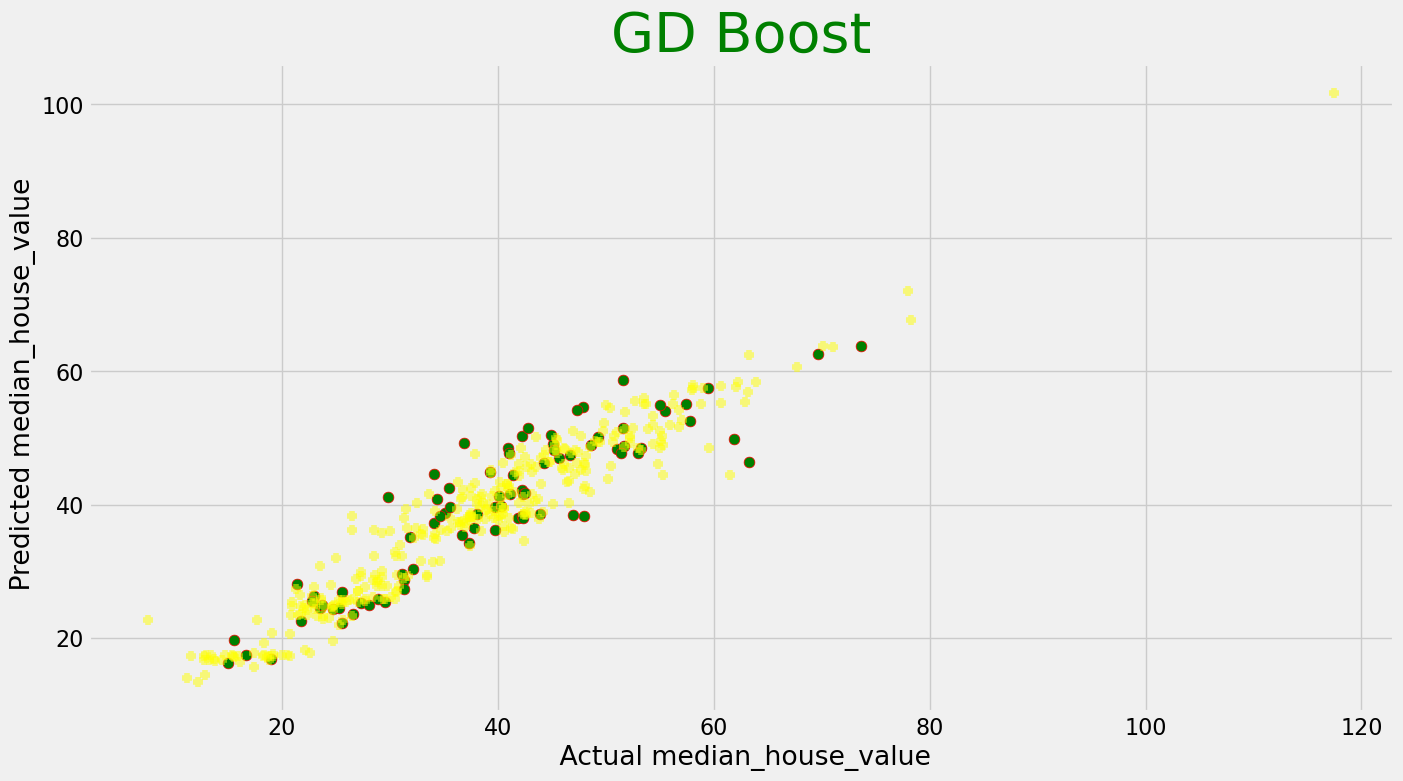

In [248]:
# Plotting Scatter plot for predicted value and actual value
fig = plt.figure(figsize=(15,8))
plt.title(label="GD Boost", fontsize=40, color='green')
plt.scatter(y_test, y_pred4, marker="o",edgecolors ="r",s=60, color='green')
plt.scatter(Y_train,model4.predict(X_train),marker="+",s=50,alpha=0.5, color='yellow')
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")

## ElasticNet Regression

In [202]:
from sklearn.linear_model import ElasticNet

model5 = ElasticNet().fit(X_train,Y_train)

In [203]:
# Predicting using ElasticNet
y_pred5 = model5.predict(x_test)

In [204]:
# MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE:",mean_absolute_error(y_test, y_pred5))
print("MSE:", mean_squared_error(y_test,y_pred5))

MAE: 5.962567464151747
MSE: 61.0175878014401


In [205]:
model5.score(x_test, y_test)

0.5912529960612685

In [206]:
# Saving Output
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred5})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\ENR_submission.csv', index=False)

In [207]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model5.predict(x_test))))
print("RMSE-train:",np.sqrt(mean_squared_error(Y_train, model5.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model5.score(x_test, y_test)))

RMSE: 7.811375538369673
RMSE-train: 9.718805647713005
R2 Value/Coefficient of Determination: 0.5912529960612685


## Stocasting Gradient Boosting

In [208]:
from sklearn.linear_model import SGDRegressor

In [209]:
# STOCASTIC REGRESSOR
model6 = SGDRegressor()
model6.fit(X_train, Y_train)
sgd_score = model6.score(X_train, Y_train)
print("R-squared:", sgd_score)

y_pred6 = model6.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, y_pred6)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy:", sgd_accuracy, "%")
model6 = SGDRegressor()
model6.fit(X_train, Y_train)
sgd_score = model6.score(X_train, Y_train)
print("R-squared:", sgd_score)

R-squared: 0.549648132751567
SGD Regressor Model Accuracy: 67.202967 %
R-squared: 0.5495488611332258


In [210]:
# Saving Output from XGBoost
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred6})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\SGD_submission.csv', index=False)

## Random Forest regressor

In [211]:
from sklearn.ensemble import RandomForestRegressor

In [212]:
# Fitting the model
model7 = RandomForestRegressor(n_estimators=30)
model7.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=30)

In [213]:
# MAking prediction
y_pred7 = model7.predict(x_test)

In [214]:
# MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE:",mean_absolute_error(y_test, y_pred7))
print("MSE:", mean_squared_error(y_test, y_pred7))

MAE: 3.915502008032129
MSE: 24.624191164658626


In [215]:
# Model Accuracy score
model7.score(x_test, y_test)

0.8350465050220939

In [216]:
# Saving Output from RfBoost
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred7})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\Output_HousePrice\RF_submission.csv', index=False)

In [217]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model7.predict(x_test))))
print("RMSE-train",np.sqrt(mean_squared_error(Y_train, model7.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model7.score(x_test, y_test)))

RMSE: 4.962276812578942
RMSE-train 3.1952505875996997
R2 Value/Coefficient of Determination: 0.8350465050220939


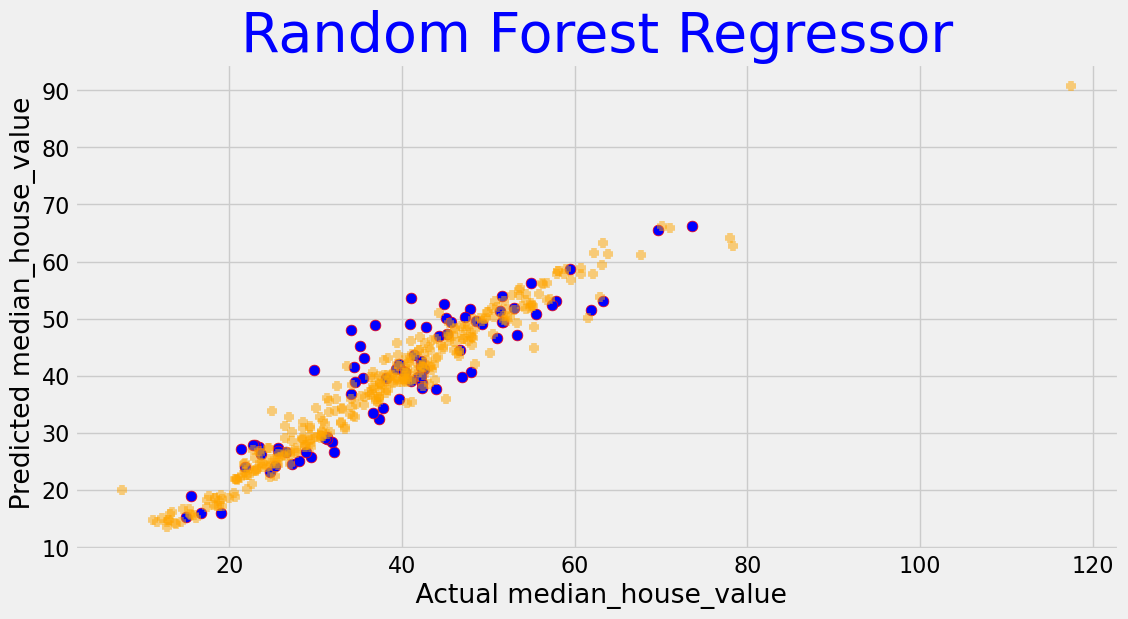

In [256]:
# Scatter plot to see the actual value vs predicted value
fig = plt.figure(figsize=(12,6))
plt.title(label="Random Forest Regressor", fontsize=40, color='blue')
plt.scatter(y_test, y_pred7, marker="o",edgecolors ="r",s=60, color='blue')
plt.scatter(Y_train,model7.predict(X_train),marker="+",s=50,alpha=0.5, color='orange')
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")
plt.show()


## XGBoost Regressor

In [219]:
# Importing XG Boost Regrressor, gridsearch
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV

In [220]:
regressor = XGBRegressor(eval_metric='rmsle')
# set up our search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}
# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, Y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [221]:
# Model fitting
model8 = XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

model8.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [222]:
# Prediction
y_pred8 = model8.predict(x_test)

In [223]:
# MAE:average of the absolute difference between the actual and predicted values
# MSE: average of the squared difference between the original and predicted values 
print("MAE:", mean_absolute_error(y_test, y_pred8))
print("MSE:", mean_squared_error(y_test, y_pred8))

MAE: 3.6640430220638422
MSE: 22.31173131593597


In [224]:
# RMAE,RMSE,and R-Squared metrics  to evaluate the prediction error rates and model performance in regression analysis
print("RMSE:",np.sqrt(mean_squared_error(y_test, model8.predict(x_test))))
print("RMSE-train",np.sqrt(mean_squared_error(Y_train, model8.predict(X_train))))
print('R2 Value/Coefficient of Determination: {}'.format(model8.score(x_test, y_test)))

RMSE: 4.723529540072335
RMSE-train 3.950127695218326
R2 Value/Coefficient of Determination: 0.8505373015112938


In [225]:
# Saving Output from XGBoost
output = pd.DataFrame({"Id":y_test.index, "House_Price":y_pred8})
output.to_csv('E:\SIMPLILEARN\KAGGLE\DataSet\XGB_submission.csv', index=False)

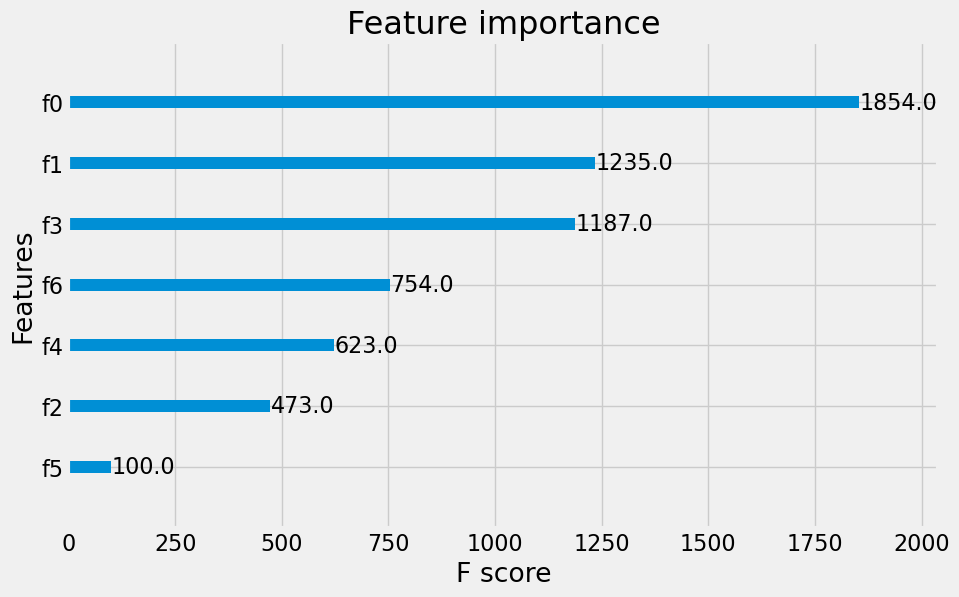

In [257]:
# Plotting to see thfeature importance
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model8, max_num_features=7, ax=ax)
plt.show()

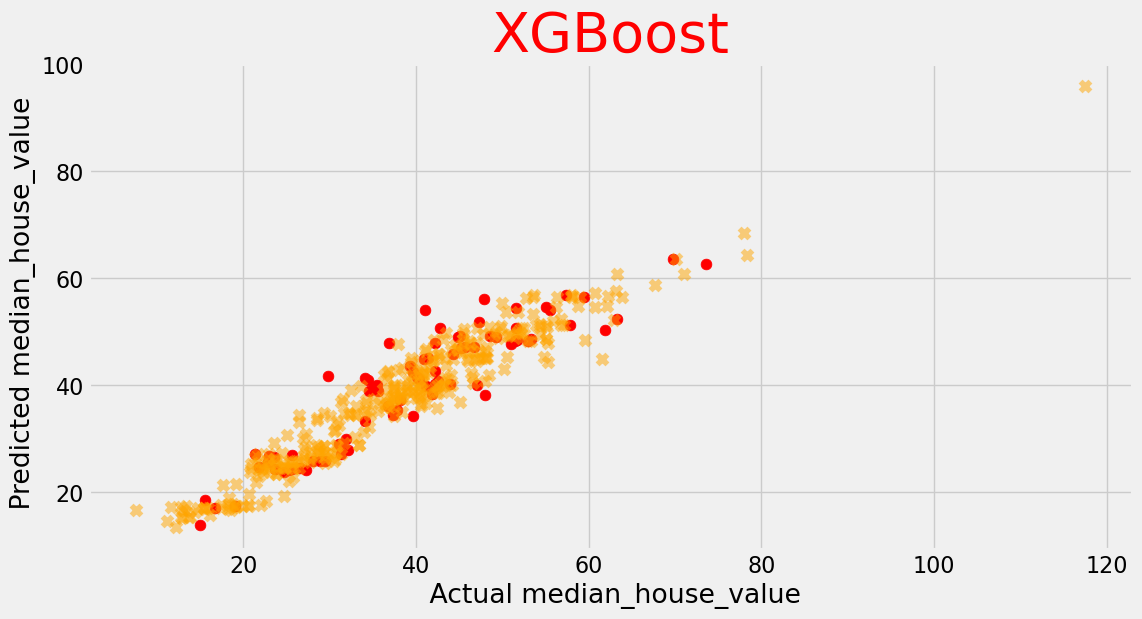

In [258]:
# Plotting Actual vs Predicted value
fig = plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred8, marker="o",edgecolors ="r",s=60, color='red')
plt.scatter(Y_train,model8.predict(X_train),marker="x",alpha=0.5, s=50, color='orange')
plt.xlabel(" Actual median_house_value")
plt.ylabel(" Predicted median_house_value")
plt.title(label="XGBoost", fontsize=40, color='red')
plt.show()

# Model Comparision

In [228]:
# Comparing the accuracy score for all the models
print('Linear Regression: {}'.format(model1.score(x_test, y_test)))
print("--"*20)
print('Lasso Regression: {}'.format(model2.score(x_test, y_test)))
print("--"*20)
print('Ridge Regression: {}'.format(model3.score(x_test, y_test)))
print("--"*20)
print('ElasticNet : {}'.format(model5.score(x_test, y_test)))
print("--"*20)
print('Schocastic Gradient Boosting: {}'.format(model6.score(x_test, y_test)))
print("--"*20)
print("--"*20)

Linear Regression: 0.6706304461258126
----------------------------------------
Lasso Regression: 0.6709216983847031
----------------------------------------
Ridge Regression: 0.6706000600942681
----------------------------------------
ElasticNet : 0.5912529960612685
----------------------------------------
Schocastic Gradient Boosting: 0.670774707878155
----------------------------------------
----------------------------------------


In [229]:
print('Gradient Booster: {}'.format(model4.score(x_test, y_test)))
print("--"*20)
print("--"*20)
print('Random Forest Regressor: {}'.format(model7.score(x_test, y_test)))
print("--"*20)
print("--"*20)
print('XG Boost Regressor: {}'.format(model8.score(x_test, y_test)))

Gradient Booster: 0.8237837199747025
----------------------------------------
----------------------------------------
Random Forest Regressor: 0.8350465050220939
----------------------------------------
----------------------------------------
XG Boost Regressor: 0.8505373015112938


### There are two models which has good accuracy

* From above comparision we've observed that these two model has performed good than others.

**Gradient Boosting Regressor**

In [230]:
print('Gradient Booster: {}'.format(model4.score(x_test, y_test)))
print("GD Boost Regressor MAE:",mean_absolute_error(y_test, y_pred4))
print("GD Boost Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred4)))

Gradient Booster: 0.8237837199747025
GD Boost Regressor MAE: 3.8969010242373505
GD Boost Regressor RMSE: 5.128888297821253


**Randon Forest Regressor**

In [231]:
print('Random Forest Regressor: {}'.format(model7.score(x_test, y_test)))
print("Random Forest Regressor MAE:",mean_absolute_error(y_test, y_pred7))
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred7)))

Random Forest Regressor: 0.8350465050220939
Random Forest Regressor MAE: 3.915502008032129
Random Forest Regressor RMSE: 4.962276812578942


**XG BOOST REGRESSOR**

In [232]:
print('XG Boost Regressor: {}'.format(model8.score(x_test, y_test)))
print("XG Boost Regressor MAE:",mean_absolute_error(y_test, y_pred8))
print("XG Boost Regressor RMSE:", np.sqrt(mean_squared_error(y_test, y_pred8)))

XG Boost Regressor: 0.8505373015112938
XG Boost Regressor MAE: 3.6640430220638422
XG Boost Regressor RMSE: 4.723529540072335


* Hence from the above comparision we observed that only 3 models have performed best i.e. 
  RandomForest Regressor, Gradient Decent Boosting Regressor & XG BOOST REGRESSOR.
* But The best performer is **XG Boost, Accuracy: 80.05, MAE: 3.66, RMSE:4.723**.
* So From the above observation we can see that XG Boost has performed the best, So we finalize the XG Boost.


Let us perform a comparison of **GD Boost vs. XG Boost Regressor Prediction** for the **Line Graph**.

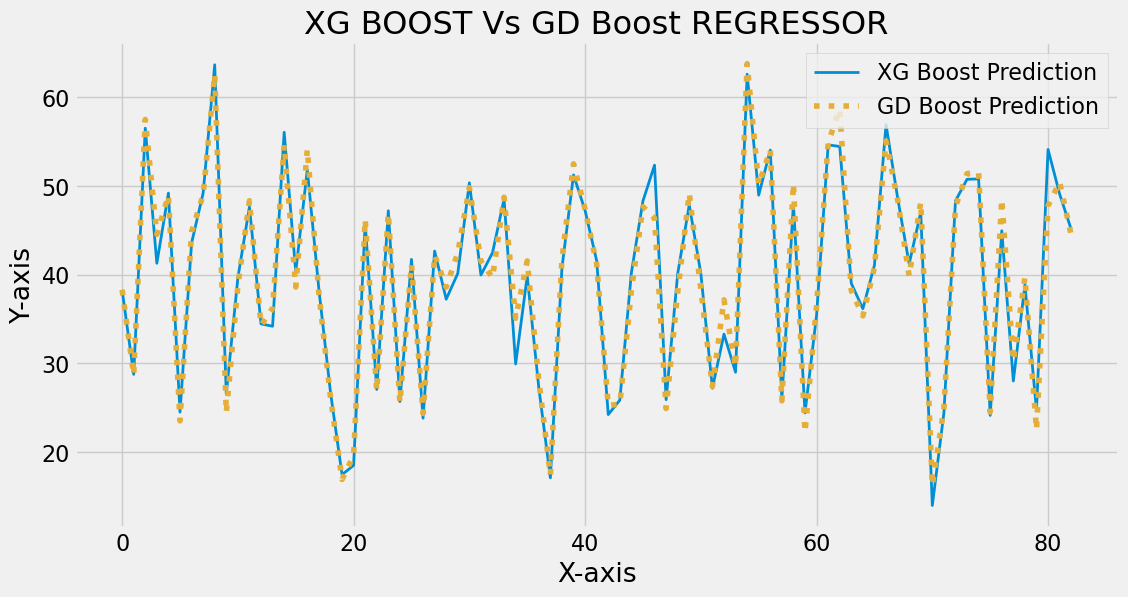

In [259]:
# Plot for XG Boost prediction vs GD boost prediction
x_ax = range(len(y_pred4))
plt.figure(figsize=(12,6))
plt.plot(x_ax, y_pred8, c="C0", linestyle="-", linewidth = 2, label="XG Boost Prediction")
plt.plot(x_ax, y_pred4, c="C2", linestyle=":", linewidth = 4, label="GD Boost Prediction")
plt.title("XG BOOST Vs GD Boost REGRESSOR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(fancybox=False, shadow=False)
plt.grid(True)
plt.show()

* Let us perform a comparison of **Random Forest vs. XG Boost Regressor Prediction** for the **Line Graph**.

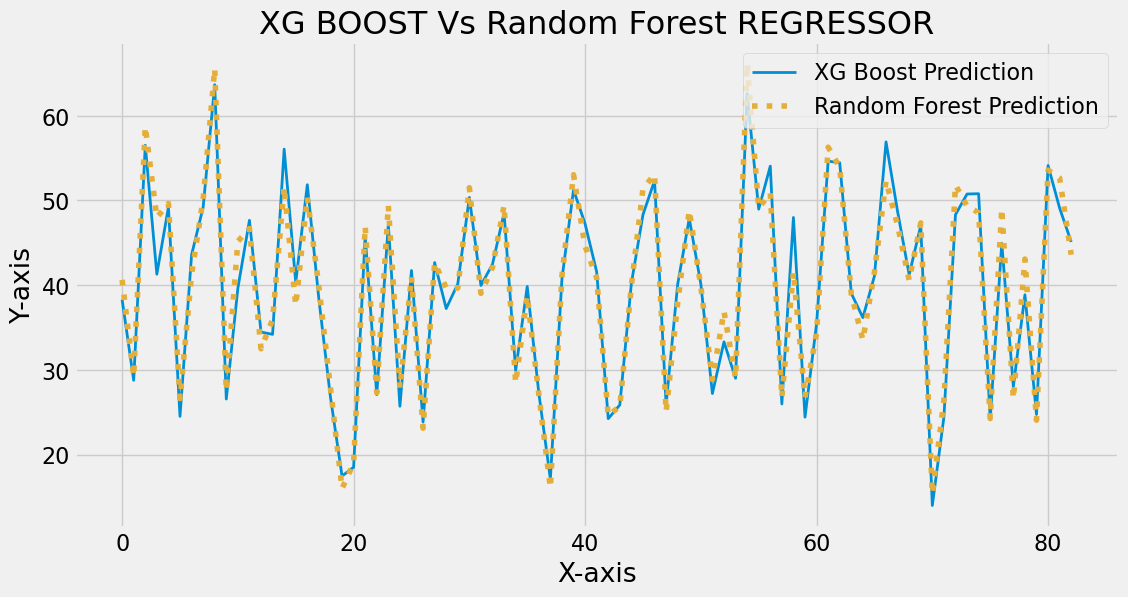

In [260]:
# Plot for XG Boost prediction vs GD boost prediction
x_ax = range(len(y_pred4))
plt.figure(figsize=(12,6))
plt.plot(x_ax, y_pred8, c="C0", linestyle="-", linewidth = 2, label="XG Boost Prediction")
plt.plot(x_ax, y_pred7, c="C2", linestyle=":", linewidth = 4, label="Random Forest Prediction")
plt.title("XG BOOST Vs Random Forest REGRESSOR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

## XGBoost